<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula03a_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
X, y = data.data, data.target
print(X.shape, y.shape)

(569, 30) (569,)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#adendo de numpy

In [13]:
import numpy as np
vetor = [1,2,3,4,5]
vetor = np.array(vetor)
print(type(vetor.shape), '\n', vetor.shape)


<class 'tuple'> 
 (5,)


In [14]:
matriz = [[1,2,3],[4,5,6],[7,8,9]]
matriz = np.array(matriz)
print(type(matriz.shape), '\n', matriz.shape)

<class 'tuple'> 
 (3, 3)


In [15]:
matriz3d = [[[1,2],[3,4]],[[5,6],[7,8]]]
matriz3d = np.array(matriz3d)
print(type(matriz3d.shape), '\n', matriz3d.shape)

<class 'tuple'> 
 (2, 2, 2)


In [29]:
print(matriz, end='\n\n')
vetor = np.array([1,2,3])
print(vetor, end='\n\n')
print(matriz * vetor)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[1 2 3]

[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]]


In [30]:
print(matriz, end='\n\n')
print(vetor, end='\n\n')
print(matriz.dot(vetor))

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[1 2 3]

[14 32 50]


In [31]:
print(matriz @ vetor)

[14 32 50]


# Distribuição das classes

In [9]:
print(sum(y)/len(y))
print(sum(y_train)/len(y_train))

0.6274165202108963
0.6285714285714286


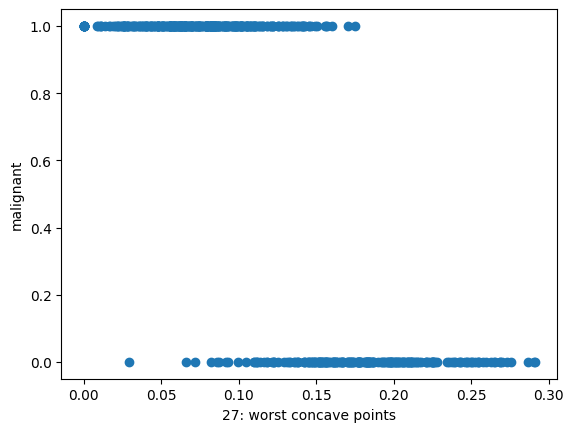

In [19]:
import matplotlib.pyplot as plt
for i in [27]: #range(X_train.shape[1]):
    plt.xlabel(f"{i}: {data.feature_names[i]}")
    plt.ylabel(data.target_names[0])
    plt.scatter(X[:,i], y)
    plt.show()

In [33]:
X_train27 = X_train[:,27:28]
X_test27 = X_test[:,27:28]

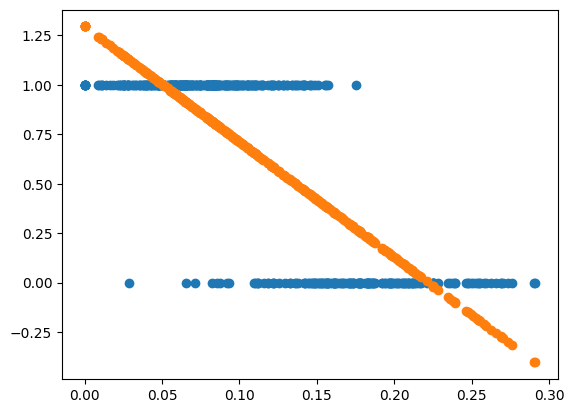

In [50]:
import numpy as np

def add_bias(X):
    bias = np.ones((X.shape[0], 1))
    return np.concatenate((bias, X), axis=1)

class LinearClassifier():
  def fit(self, X, y):
    X = add_bias(X)
    self.w = np.linalg.pinv(X) @ y
    return self

  def predict(self, X):
    X = add_bias(X)
    return X @ self.w

model = LinearClassifier().fit(X_train27, y_train)
y_pred = model.predict(X_train27)
plt.scatter(X_train27, y_train)
plt.scatter(X_train27, y_pred)
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train, y_pred))

0.08817201142291226


In [52]:
print(sum(y_train == y_pred))

0


In [62]:
new_pred = y_pred>=0.5
print(sum(new_pred == y_train))

414


In [63]:
mean_squared_error(y_train, new_pred)

0.09010989010989011

In [66]:
print(sum(y_pred == y_train)/len(y_train))
print(sum(new_pred == y_train)/len(y_train))

0.0
0.9098901098901099


In [67]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train, new_pred)
print(1-acc)

0.09010989010989012


0.9098901098901099


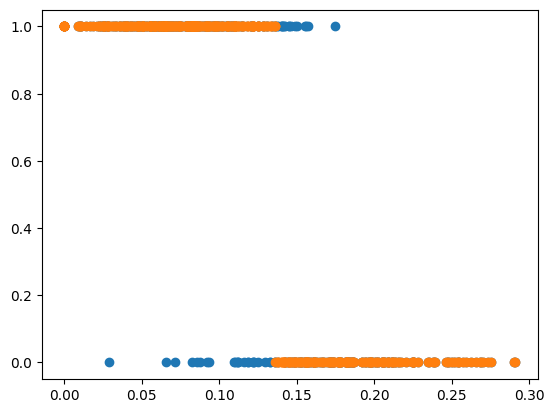

In [68]:
def add_bias(X):
    bias = np.ones((X.shape[0], 1))
    return np.concatenate((bias, X), axis=1)

class LinearClassifier():
  def fit(self, X, y):
    X = add_bias(X)
    self.w = np.linalg.pinv(X) @ y
    return self

  def predict(self, X):
    X = add_bias(X)
    return (X @ self.w) >= 0.5

model = LinearClassifier().fit(X_train27, y_train)
y_pred = model.predict(X_train27)
print(accuracy_score(y_train, y_pred))
plt.scatter(X_train27, y_train)
plt.scatter(X_train27, y_pred)
plt.show()

In [69]:
model = LinearClassifier().fit(X_train, y_train)
y_pred = model.predict(X_train)
print(accuracy_score(y_train, y_pred))

0.9626373626373627


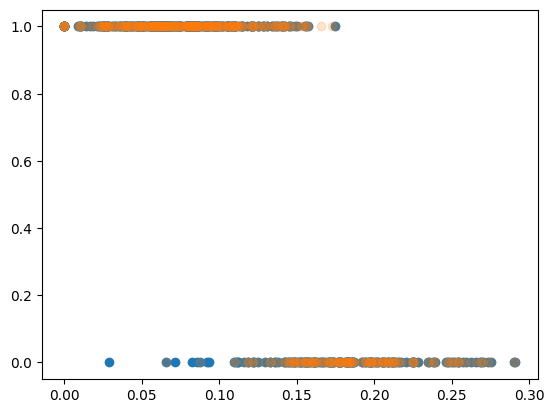

In [71]:
plt.scatter(X_train27, y_train)
plt.scatter(X_train27, y_pred, alpha=0.2)
plt.show()

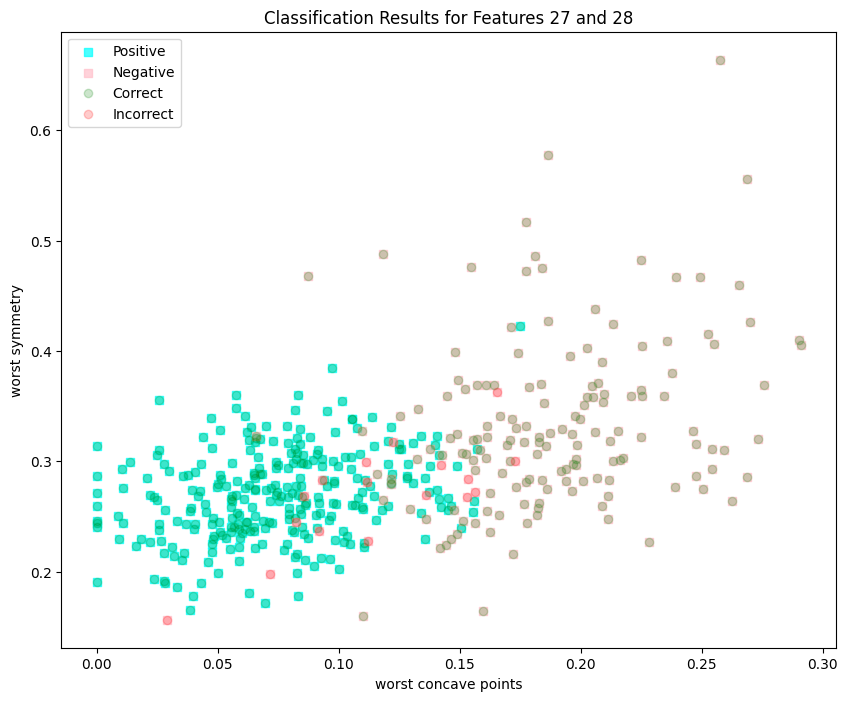

In [76]:
import matplotlib.pyplot as plt

# Select features 27 and 28
X_train27_28 = X_train[:, [27, 28]]

# Make predictions using the model trained on all features
y_pred_all = model.predict(X_train)

# Create boolean masks for different categories
real_negative = y_train == 0
real_positive = y_train == 1
correct_predictions = y_train == y_pred_all
incorrect_predictions = y_train != y_pred_all

# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(X_train27_28[real_positive, 0], X_train27_28[real_positive, 1], marker='s', c='cyan', label='Positive', alpha=0.7)
plt.scatter(X_train27_28[real_negative, 0], X_train27_28[real_negative, 1], marker='s', c='pink', label='Negative', alpha=0.7)
plt.scatter(X_train27_28[correct_predictions, 0], X_train27_28[correct_predictions, 1], c='green', label='Correct', alpha=0.2)
plt.scatter(X_train27_28[incorrect_predictions, 0], X_train27_28[incorrect_predictions, 1], c='red', label='Incorrect', alpha=0.2)

plt.xlabel(f"{data.feature_names[27]}")
plt.ylabel(f"{data.feature_names[28]}")
plt.title('Classification Results for Features 27 and 28')
plt.legend()
plt.show()

In [77]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.956140350877193


In [82]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=9999).fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.956140350877193


In [99]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='log_loss').fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9473684210526315


In [100]:
losses = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
for loss in losses:
    model = SGDClassifier(loss=loss).fit(X_train, y_train)
    y_pred = model.predict(X_train)
    print(loss, accuracy_score(y_train, y_pred))

hinge 0.9076923076923077
log_loss 0.9120879120879121
modified_huber 0.8747252747252747
squared_hinge 0.756043956043956
perceptron 0.8989010989010989
squared_error 0.37142857142857144
huber 0.6285714285714286
epsilon_insensitive 0.37142857142857144
squared_epsilon_insensitive 0.37142857142857144


In [101]:
from sklearn.svm import SVC
model = SVC().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9473684210526315


In [102]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = model.predict(X_train)
print(accuracy_score(y_train, y_pred))

1.0


In [103]:
model = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9298245614035088


In [104]:
from sklearn.metrics import confusion_matrix

model = LinearClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[39  4]
 [ 1 70]]


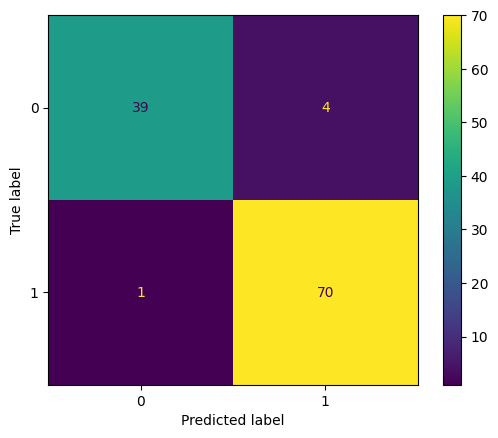

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay
_ = ConfusionMatrixDisplay(cm).plot()

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
model = LinearClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        39
           1       0.94      1.00      0.97        75

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
model = LinearClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.99      1.00      0.99        75

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [111]:
from sklearn.base import BaseEstimator, ClassifierMixin

def add_bias(X):
    bias = np.ones((X.shape[0], 1))
    return np.concatenate((bias, X), axis=1)

class LinearClassifier(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    X = add_bias(X)
    self.w = np.linalg.pinv(X) @ y
    return self

  def predict(self, X):
    X = add_bias(X)
    return (X @ self.w) >= 0.5

In [119]:
from sklearn.model_selection import cross_validate
import pprint

model = LinearClassifier()
cv_results = cross_validate(model, X, y, cv=5, scoring='accuracy')
pprint.pprint(cv_results)
print(cv_results['test_score'].mean())

{'fit_time': array([0.0030334 , 0.00093102, 0.01439118, 0.0034678 , 0.00092316]),
 'score_time': array([0.00078773, 0.00063872, 0.0011344 , 0.00072503, 0.00684166]),
 'test_score': array([0.9122807 , 0.93859649, 0.96491228, 0.99122807, 0.97345133])}
0.9560937742586555


In [120]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
cv_results = cross_validate(model, X, y, cv=kf, scoring='accuracy')
pprint.pprint(cv_results)
print(cv_results['test_score'].mean())

{'fit_time': array([0.0029273 , 0.00087762, 0.00078845, 0.00082445, 0.00095963]),
 'score_time': array([0.00079203, 0.00056839, 0.00067925, 0.0028398 , 0.00057578]),
 'test_score': array([0.9122807 , 0.93859649, 0.96491228, 0.99122807, 0.97345133])}
0.9560937742586555


In [146]:
kf = KFold(n_splits=5, shuffle=True)
cv_results = cross_validate(model, X, y, cv=kf, scoring='accuracy')
pprint.pprint(cv_results)
print(cv_results['test_score'].mean())

{'fit_time': array([0.20901942, 0.0596993 , 0.00100422, 0.01606369, 0.00820231]),
 'score_time': array([0.00139141, 0.00098729, 0.00070667, 0.00104928, 0.00096464]),
 'test_score': array([0.94736842, 0.95614035, 0.93859649, 0.96491228, 0.96460177])}
0.9543238627542306


In [157]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_results = cross_validate(model, X, y, cv=kf, scoring='accuracy')
pprint.pprint(cv_results)
print(cv_results['test_score'].mean())

{'fit_time': array([0.00255322, 0.00093341, 0.00086212, 0.00129342, 0.00089478]),
 'score_time': array([0.00078154, 0.00065231, 0.00057292, 0.00071311, 0.00059628]),
 'test_score': array([0.96491228, 0.93859649, 0.93859649, 0.98245614, 0.94690265])}
0.9542928116752056


In [165]:
from sklearn.model_selection import RepeatedStratifiedKFold
kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
model = LinearClassifier()
cv_results1 = cross_validate(model, X, y, cv=kf, scoring='accuracy')
pprint.pprint(cv_results1['test_score'])
print(cv_results1['test_score'].mean())

array([0.94736842, 0.9122807 , 0.95614035, 0.99122807, 0.9380531 ,
       0.96491228, 0.97368421, 0.95614035, 0.96491228, 0.92920354,
       0.99122807, 0.96491228, 0.92105263, 0.96491228, 0.94690265,
       0.93859649, 0.92982456, 0.97368421, 0.97368421, 0.96460177,
       0.94736842, 0.96491228, 0.95614035, 0.96491228, 0.96460177,
       0.92982456, 0.96491228, 1.        , 0.93859649, 0.94690265,
       0.97368421, 0.93859649, 0.94736842, 0.93859649, 0.97345133,
       0.93859649, 0.95614035, 0.96491228, 0.95614035, 0.97345133,
       0.97368421, 0.95614035, 0.95614035, 0.96491228, 0.9380531 ,
       0.96491228, 0.92105263, 0.94736842, 0.96491228, 0.95575221])
0.9557071883247942


In [166]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
cv_results2 = cross_validate(model, X, y, cv=kf, scoring='accuracy')
pprint.pprint(cv_results2['test_score'])
print(cv_results2['test_score'].mean())

array([0.92982456, 0.98245614, 0.95614035, 0.98245614, 0.95575221,
       0.94736842, 0.95614035, 0.99122807, 0.95614035, 0.95575221,
       0.94736842, 0.95614035, 0.96491228, 0.96491228, 0.95575221,
       0.95614035, 0.96491228, 0.93859649, 0.95614035, 0.97345133,
       0.95614035, 0.96491228, 0.94736842, 0.97368421, 0.98230088,
       0.94736842, 0.98245614, 0.98245614, 0.95614035, 0.92035398,
       0.96491228, 0.96491228, 0.97368421, 0.96491228, 0.9380531 ,
       0.94736842, 0.92982456, 0.95614035, 0.96491228, 0.98230088,
       0.97368421, 0.99122807, 0.93859649, 0.94736842, 0.9380531 ,
       0.95614035, 0.96491228, 0.95614035, 0.97368421, 0.99115044])
0.9604548983077161


In [167]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(cv_results1['test_score'], cv_results2['test_score'])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the models.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the models.")

t-statistic: -1.3524946045488562
p-value: 0.1793297020043074
Fail to reject the null hypothesis: There is no significant difference between the models.
